# Crop Yield Prediction

## Preprocessing steps
1. Acquire the dataset
2. Import all the crucial libraries
3. Import the dataset
4. Identifying and handling the missing values
5. Encoding the categorical data
6. Splitting the dataset
7. Feature scaling

# Preprocessing

## 1. Acquire the Dataset
### From kaggle - Crop yield prediction

## 2. Importing libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Import the dataset

In [2]:
#loading the datasets
Temp = pd.read_csv('Crop-Yield-Prediction-Datasets/temp.csv')
Yield = pd.read_csv('Crop-Yield-Prediction-Datasets/yield.csv')
Pesticides = pd.read_csv('Crop-Yield-Prediction-Datasets/pesticides.csv')
Rainfall = pd.read_csv('Crop-Yield-Prediction-Datasets/rainfall.csv')

In [3]:
#reading first five rows
Temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [4]:
#reading last five rows
Temp.tail()

,year,country,avg_temp
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52
71310,2013,Mexico,22.19


In [5]:
#checking unique items in the country column
Temp['country'].unique()

array(["Côte D'Ivoire", 'United Arab Emirates', 'Nigeria', 'Ghana',
       'Turkey', 'Australia', 'India', 'United States', 'Egypt',
       'Algeria', 'Kazakhstan', 'Netherlands', 'China', 'Madagascar',
       'Eritrea', 'Greece', 'Iraq', 'Azerbaijan', 'Mali', 'Indonesia',
       'Thailand', 'Central African Republic', 'Spain', 'Venezuela',
       'Colombia', 'Lebanon', 'United Kingdom', 'Serbia', 'Brazil',
       'Libya', 'Germany', 'Switzerland', 'Guinea Bissau', 'Slovakia',
       'Congo', 'Belgium', 'Romania', 'Hungary', 'Burundi', 'Morocco',
       'Russia', 'Moldova', 'Sri Lanka', 'Guinea', 'Denmark', 'Argentina',
       'Senegal', 'Syria', 'Tanzania', 'Bangladesh', 'Qatar', 'Cameroon',
       'Ireland', 'South Africa', 'Tajikistan', 'Mexico', 'Pakistan',
       'Sierra Leone', 'Botswana', 'Guyana', 'Guatemala', 'Ecuador',
       'Vietnam', 'Zimbabwe', 'Finland', 'Japan', 'Sudan', 'Afghanistan',
       'Uganda', 'Taiwan', 'Nepal', 'Ukraine', 'Rwanda', 'Canada',
       'Jamaica', 

In [6]:
# checking the number of unique values in the country column
Temp['country'].nunique()

137

In [7]:
# grouping the other column item correspoing to that country
Temp.groupby('country').count()

,year,avg_temp
country,,
Afghanistan,181,179
Albania,271,267
Algeria,261,261
Angola,158,148
Argentina,318,318
...,...,...
Uzbekistan,182,182
Venezuela,950,874
Vietnam,363,348


In [8]:
# renaming the columns
Temp = Temp.rename(index=str, columns={"year": "Year", "country":'Area'})
Temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [9]:
Yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [10]:
Yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [11]:
# rename columns.
Yield = Yield.rename(index=str, columns={"Value": "Yield_hg_ha"})
Yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Yield_hg_ha
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [12]:
Yield['Domain'].nunique()

1

In [13]:
Yield['Area'].nunique()

212

In [14]:
Yield['Element'].nunique()

1

In [15]:
Yield['Item'].nunique()

10

In [16]:
Yield['Unit'].nunique()

1

In [17]:
# drop unwanted columns.
Yield = Yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
Yield.head()

,Area,Item,Year,Yield_hg_ha
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [18]:
Pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [19]:
Pesticides.tail()

,Domain,Area,Element,Item,Year,Unit,Value
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07
4348,Pesticides Use,Zimbabwe,Use,Pesticides (total),2016,tonnes of active ingredients,2185.07


In [20]:
Pesticides['Domain'].nunique()

1

In [21]:
Pesticides['Area'].nunique()

168

In [22]:
Pesticides['Element'].nunique()

1

In [23]:
Pesticides['Item'].nunique()

1

In [24]:
Pesticides['Year'].nunique()

27

In [25]:
Pesticides['Unit'].nunique()

1

In [26]:
Pesticides = Pesticides.drop(['Element','Domain','Unit','Item'], axis=1)

In [27]:
Pesticides.head()

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [28]:
Pesticides = Pesticides.rename(index=str, columns={"Value": "pesticides_tonnes"})

In [29]:
Pesticides.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [30]:
Pesticides.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [31]:
Rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [32]:
Rainfall.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [33]:
Yield.columns

Index(['Area', 'Item', 'Year', 'Yield_hg_ha'], dtype='object')

In [34]:
Rainfall.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [35]:
Rainfall = Rainfall.rename(index=str, columns={" Area": 'Area'})
Rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [36]:
Rainfall['average_rain_fall_mm_per_year'].nunique()

173

In [37]:
Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [38]:
# convert average_rain_fall_mm_per_year from object to float
Rainfall['average_rain_fall_mm_per_year'] = pd.to_numeric(Rainfall['average_rain_fall_mm_per_year'],errors = 'coerce')
Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


## 4. Identifying and handling the missing values

In [39]:
Rainfall.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,5947.000000
mean,2001.354839,1124.743232
std,9.530114,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [40]:
Q1 = Rainfall.average_rain_fall_mm_per_year.quantile(0.25)
Q3 = Rainfall.average_rain_fall_mm_per_year.quantile(0.75)
IQR = Q3 - Q1
Rainfall = Rainfall[(Rainfall.average_rain_fall_mm_per_year >= Q1 - 1.5*IQR) & (Rainfall.average_rain_fall_mm_per_year <= Q3 + 1.5*IQR)]

In [41]:
Rainfall = Rainfall.dropna()

In [42]:
# merge yield dataframe with rain dataframe by year and area columns 
Yield = pd.merge(Yield, Rainfall, on=['Year','Area'])

In [43]:
Yield.shape

(25385, 5)

In [44]:
Yield.head()

,Area,Item,Year,Yield_hg_ha,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [45]:
Yield.describe()

,Year,Yield_hg_ha,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


In [46]:
Pesticides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [47]:
Yield = pd.merge(Yield, Pesticides, on=['Year','Area'])
Yield.head()

,Area,Item,Year,Yield_hg_ha,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [48]:
Yield.shape

(18949, 6)

In [49]:
Yield = pd.merge(Yield,Temp, on=['Area','Year'])
Yield.head()

,Area,Item,Year,Yield_hg_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [50]:
Yield.shape

(28242, 7)

## Final dataset after merging (7columns and 28,242 rows)
#### After  droping the null values

In [51]:
Yield.describe()

,Year,Yield_hg_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [52]:
Q1 = Yield.average_rain_fall_mm_per_year.quantile(0.25)
Q3 = Yield.average_rain_fall_mm_per_year.quantile(0.75)
IQR = Q3 - Q1
Yield = Yield[(Yield.average_rain_fall_mm_per_year >= Q1 - 1.5*IQR) & (Yield.average_rain_fall_mm_per_year <= Q3 + 1.5*IQR)]

In [53]:
Q1 = Yield.Yield_hg_ha.quantile(0.25)
Q3 = Yield.Yield_hg_ha.quantile(0.75)
IQR = Q3 - Q1
Yield = Yield[(Yield.Yield_hg_ha >= Q1 - 1.5*IQR) & (Yield.Yield_hg_ha <= Q3 + 1.5*IQR)]

In [54]:
Q1 = Yield.pesticides_tonnes.quantile(0.25)
Q3 = Yield.pesticides_tonnes.quantile(0.75)
IQR = Q3 - Q1
Yield = Yield[(Yield.pesticides_tonnes >= Q1 - 1.5*IQR) & (Yield.pesticides_tonnes <= Q3 + 1.5*IQR)]

In [55]:
Yield['Item'].nunique()

10

In [56]:
Yield['Area'].nunique()

101

In [57]:
Yield.groupby('Area').count()

,Item,Year,Yield_hg_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Area,,,,,,
Albania,96,96,96,96,96,96
Algeria,108,108,108,108,108,108
Angola,164,164,164,164,164,164
Argentina,306,306,306,306,306,306
Armenia,63,63,63,63,63,63
...,...,...,...,...,...,...
Ukraine,126,126,126,126,126,126
United Kingdom,115,115,115,115,115,115
Uruguay,161,161,161,161,161,161


In [58]:
Yield.groupby('Area').sum()

,Year,Yield_hg_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Area,,,,,
Albania,192035,4958677,142560.0,56471.44,1563.15
Algeria,216108,5053466,9612.0,416610.82,1887.00
Angola,328374,5722563,165640.0,9299.00,3987.06
Argentina,612024,21469698,180846.0,17938285.44,5424.72
Armenia,126156,4524100,35406.0,8734.71,603.60
...,...,...,...,...,...
Ukraine,252312,5496901,71190.0,5863471.80,1060.08
United Kingdom,230165,8714845,140300.0,3238335.70,1104.32
Uruguay,322231,9539820,209300.0,1284138.31,2733.92


In [59]:
Yield.groupby(['Area'],sort=True)['Yield_hg_ha'].sum().nlargest(10)

Area
India        203878466
Mexico       103854072
Pakistan      73897434
Indonesia     69193506
Japan         56534946
Brazil        49778201
Spain         34187718
Australia     33993696
Canada        33200958
Colombia      25703722
Name: Yield_hg_ha, dtype: int64

In [60]:
Yield.groupby(['Item','Area'],sort=True)['Yield_hg_ha'].sum().nlargest(10)

Item            Area     
Potatoes        India        92122514
Sweet potatoes  India        44439538
                Mexico       35808592
Potatoes        Pakistan     32969754
Yams            Japan        27765852
Sweet potatoes  Pakistan     21687615
Cassava         Mexico       21610424
Potatoes        Indonesia    21560562
Cassava         Indonesia    20686458
                India        19268766
Name: Yield_hg_ha, dtype: int64

## Data Visualization

In [61]:
Yield.head()

,Area,Item,Year,Yield_hg_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


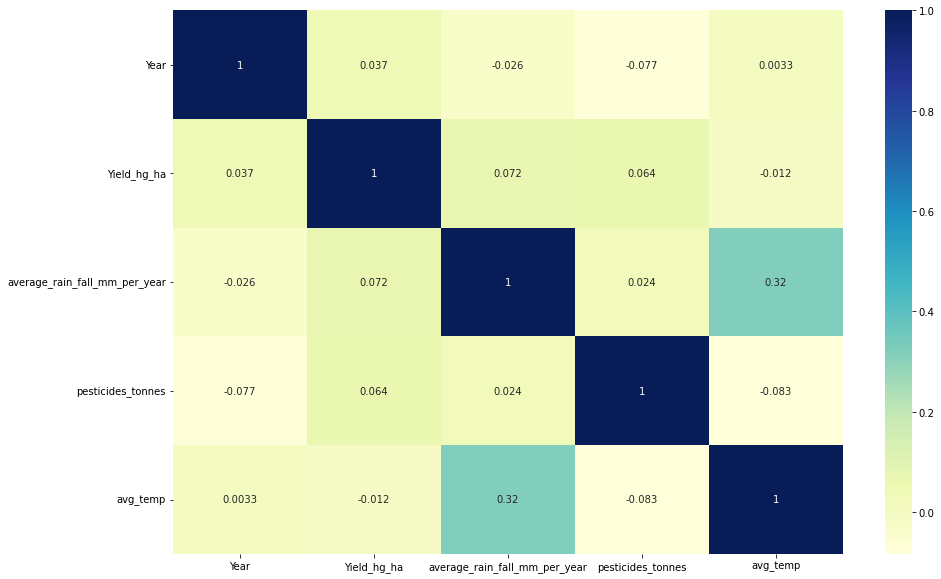

In [62]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(Yield.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### "Yield-hg/ha" and "average_rain_fall_mm_per_year" are least corrilated
#### "average_rain_fall_mm_per_year" and "avg_temp" are corrilated with 31%

## Univariate

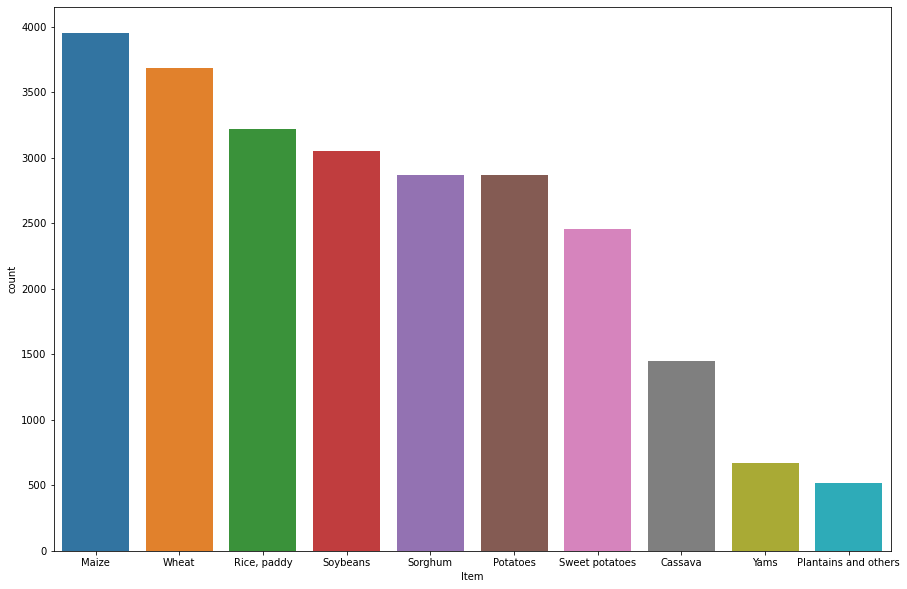

In [63]:
fig, ax = plt.subplots(figsize=(15,10))
y_count=sns.countplot(x='Item',data=Yield, ax = ax, order = Yield['Item'].value_counts().index)

#### Potatoes is maize and other items

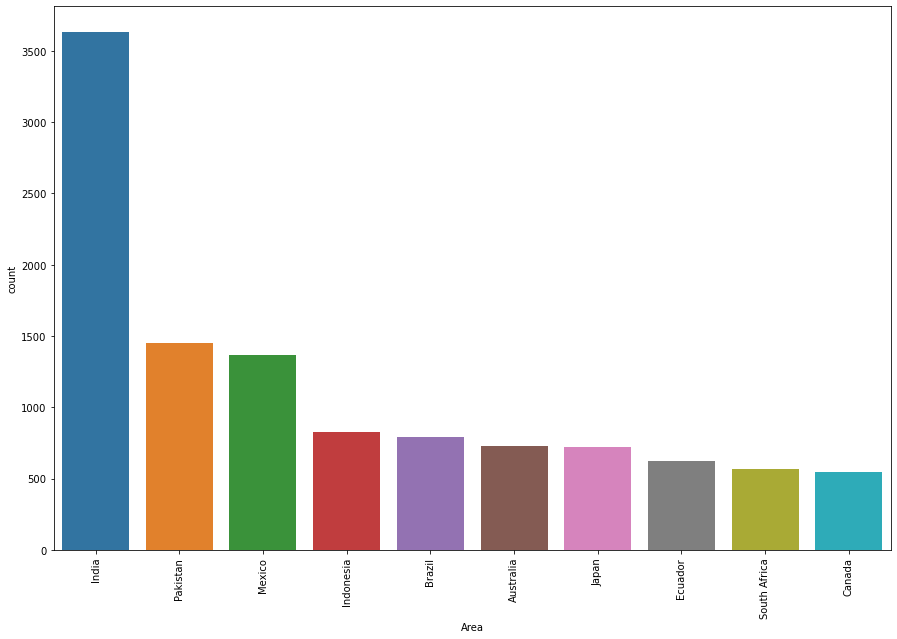

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Area',data=Yield, ax = ax, order = Yield['Area'].value_counts().iloc[:10].index)

#### India has more yield than other countries

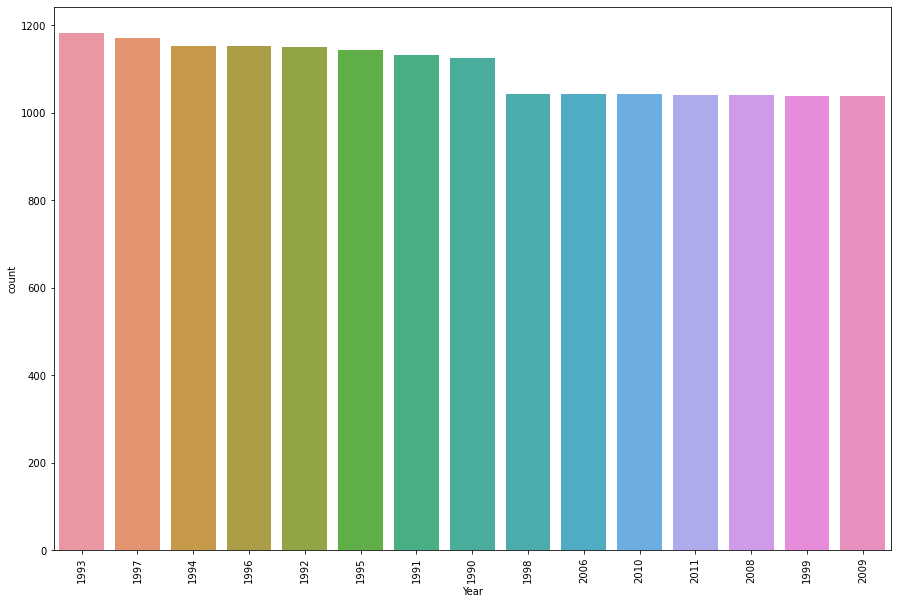

In [65]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Year',data=Yield, ax = ax, order = Yield['Year'].value_counts().iloc[:15].index)

#### 2012 has more entries

## Bivariate

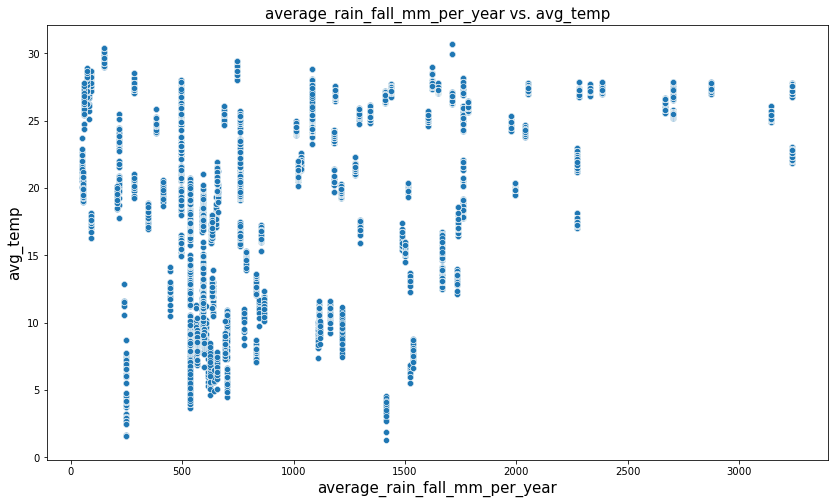

In [66]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=Yield, x="average_rain_fall_mm_per_year", y="avg_temp", ax = ax)
plt.title("average_rain_fall_mm_per_year vs. avg_temp", size=15)
plt.ylabel(("avg_temp"), size=15)
plt.xlabel("average_rain_fall_mm_per_year", size=15)
plt.show()

#### As Average temperature increses average rain fall increases

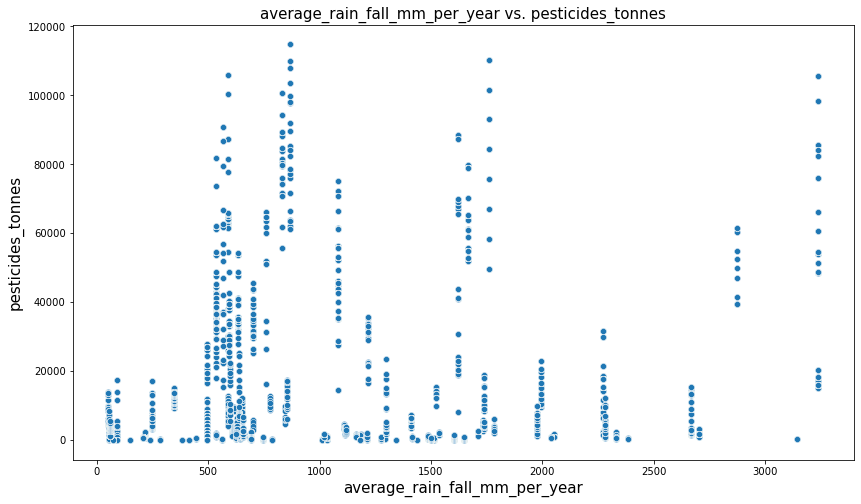

In [67]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=Yield, x="average_rain_fall_mm_per_year", y="pesticides_tonnes", ax = ax)
plt.title("average_rain_fall_mm_per_year vs. pesticides_tonnes", size=15)
plt.ylabel(("pesticides_tonnes"), size=15)
plt.xlabel("average_rain_fall_mm_per_year", size=15)
plt.show()

#### There is no much information to understand

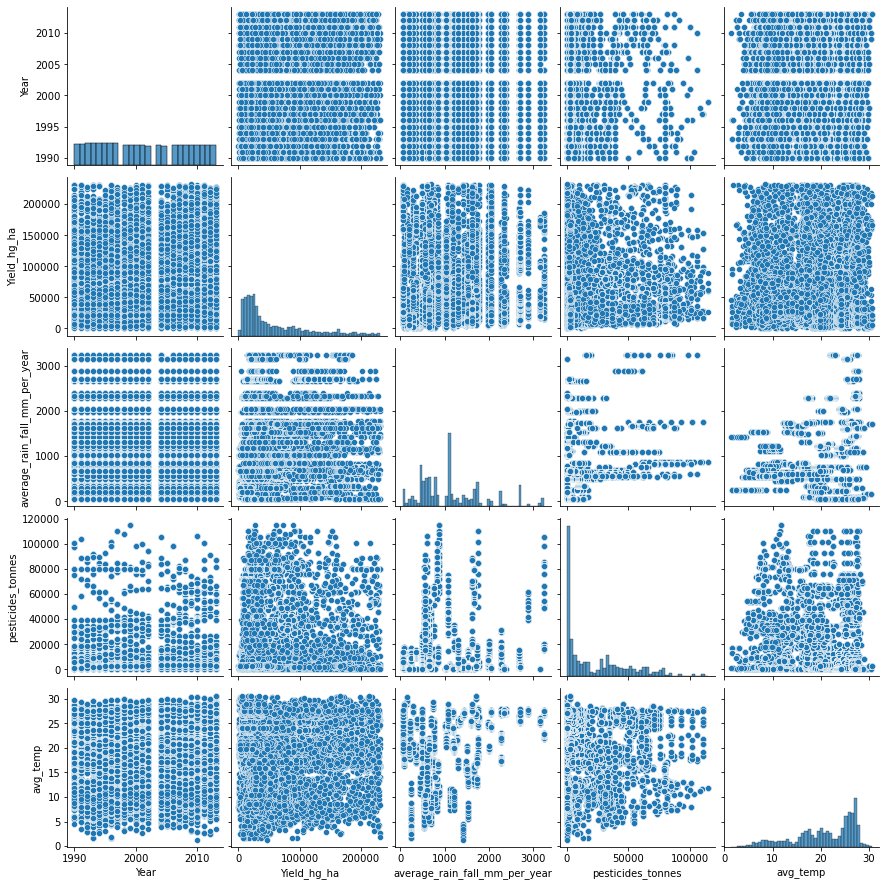

In [68]:
sns.pairplot(Yield)

#### Here we can see the distribusion of all the numerical features with there scattering

## 5. Encoding the categorical data

In [69]:
## We are using get_dummies to make all the dummies into features
Yield_ohe = pd.get_dummies(Yield, columns=['Area',"Item"], prefix = ['Country',"Item"])
X=Yield_ohe.drop(['Yield_hg_ha'],axis = 1)
Y=Yield['Yield_hg_ha']
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24729 entries, 0 to 28241
Columns: 115 entries, Year to Item_Yams
dtypes: float64(3), int64(1), uint8(111)
memory usage: 4.1 MB


## 6. Splitting the dataset

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## 7. Feature scaling

In [72]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

## Model Building

### 8. Import algorithm

In [74]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
sk_model = Lasso(alpha=10)

### 9. Model fitting

In [75]:
model = LinearRegression()

In [76]:
model = model.fit(X_train, y_train)

In [77]:
model.score(X_train, y_train)*100

77.73797968907174

In [78]:
y_pred_lr = model.predict(X_test)

In [79]:
sk_model.fit(X_train, y_train)

Lasso(alpha=10)

In [80]:
sk_model.score(X_train, y_train)*100

77.73757956254418

### 10. Model prediction

In [81]:
y_pred = sk_model.predict(X_test)

### 11. Model performance with test data

In [82]:
from sklearn import metrics
print('Linear_Regression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred_lr)*100))
score = metrics.r2_score(y_test,y_pred_lr)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_lr)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))

Linear_Regression
r2_score 77.17
Adjusted_r2_score 76.81
MAE: 18908.14
RMSE: 26823.83


In [83]:
from sklearn import metrics
print('Linear_Regression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Linear_Regression
r2_score 77.17
Adjusted_r2_score 76.81
MAE: 18903.35
RMSE: 26826.79


## There is no overfitting in the model